In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
dt = pd.read_csv('data/final_board_game_dataset.csv')
dt.head(10)

,@objectid,name,yearpublished,boardgamepublisher,boardgamecategory,boardgamemechanic,minplayers,maxplayers,age,minplaytime,maxplaytime,boardgameexpansion,description,image
0,1,Die Macher,1986.0,Hans im Glück,"['Economic', 'Negotiation', 'Political']","['Alliances', 'Area Majority / Influence', 'Au...",3.0,5.0,14.0,240.0,240.0,NaN,Die Macher is a game about seven sequential po...,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...
1,2,Dragonmaster,1981.0,E. S. Lowe Company Inc.,"['Card Game', 'Fantasy']",['Trick-taking'],3.0,4.0,12.0,30.0,30.0,NaN,Dragonmaster is a trick-taking card game based...,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
2,3,Samouraï,1998.0,Fantasy Flight Games,"['Abstract Strategy', 'Medieval']","['Area Majority / Influence', 'Hand Management...",2.0,4.0,10.0,30.0,60.0,NaN,Samurai is set in medieval Japan. Players comp...,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...
3,4,Tal der Könige,1992.0,KOSMOS,['Ancient'],"['Action Points', 'Area Majority / Influence',...",2.0,4.0,12.0,60.0,60.0,NaN,When you see the triangular box and the luxuri...,https://cf.geekdo-images.com/nYiYhUlatT2DpyXaJ...
4,5,Acquire,1963.0,3M,"['Economic', 'Territory Building']","['Hand Management', 'Investment', 'Market', 'S...",2.0,6.0,12.0,90.0,90.0,['1963 World Map Conversion Kit for the Game o...,"In Acquire, each player strategically invests ...",https://cf.geekdo-images.com/FfguJeknahk88vKT7...
5,6,Mare Mediterraneum,1989.0,Historien Spiele Galerie (Historien Spielegale...,"['Civilization', 'Nautical']",['Dice Rolling'],2.0,6.0,12.0,240.0,240.0,NaN,"In the ancient lands along the Mediterranean, ...",https://cf.geekdo-images.com/277POF80AUz2ZE9XS...
6,7,Castle City,1979.0,Brightway Products Ltd,"['Abstract Strategy', 'Childrens Game', 'City ...","['Enclosure', 'Pattern Building', 'Pattern Rec...",2.0,2.0,8.0,20.0,20.0,NaN,"In Cathedral, each player has a set of pieces ...",https://cf.geekdo-images.com/78Dgd-b_1_xEv4OXV...
7,8,Lords of Creation,1993.0,Vendetta,"['Civilization', 'Fantasy']",['Modular Board'],2.0,5.0,12.0,120.0,120.0,NaN,"In this interesting offering from Warfrog, pla...",https://cf.geekdo-images.com/-pwShxFPJWrxye8o1...
8,9,El Caballero,1998.0,999 Games,['Exploration'],"['Area Majority / Influence', 'Tile Placement']",2.0,4.0,13.0,90.0,90.0,NaN,"Although referred to as a sequel to El Grande,...",https://cf.geekdo-images.com/lWotCtplnl0sI3bS_...
9,10,Elfenland,1998.0,AMIGO,"['Fantasy', 'Travel']","['Hand Management', 'Network and Route Buildin...",2.0,6.0,10.0,60.0,60.0,"['Brettspiel Adventskalender 2018', 'Elfengold...",Elfenland is a redesign of the original White ...,https://cf.geekdo-images.com/Ea4jN5Ko5bPrXrU_A...


In [3]:
dt = dt.drop(columns=['@objectid', 'boardgamepublisher', 'boardgamemechanic', 'boardgameexpansion', 'image'], axis=1)

In [4]:
# pd.set_option('display.max_colwidth', -1)
oldest_game = dt[dt['yearpublished'] == dt['yearpublished'].min()]
oldest_game

,name,yearpublished,boardgamecategory,minplayers,maxplayers,age,minplaytime,maxplaytime,description
2138,30 Squares,-3500.0,"['Abstract Strategy', 'Religious']",2.0,2.0,6.0,30.0,30.0,Senet is an ancient Egyptian board game simila...


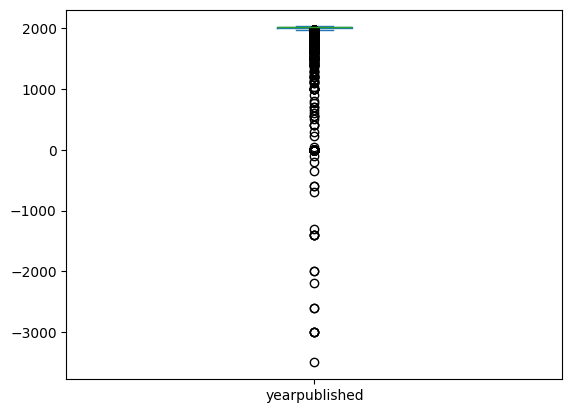

In [5]:
dt['yearpublished'].plot(kind='box')
plt.show()

In [6]:
print(dt['minplayers'].min())
print(dt['minplayers'].max())

0.0
2024.0


In [7]:
print(dt['maxplayers'].min())
print(dt['maxplayers'].max())

0.0
11299.0


In [8]:
print(dt['age'].min())
print(dt['age'].max())

0.0
180.0


In [9]:
print(dt['minplaytime'].min())
print(dt['minplaytime'].max())

0.0
157680.0


In [10]:
print(dt['maxplaytime'].min())
print(dt['maxplaytime'].max())

0.0
63072000.0


In [11]:
dt.describe()

,yearpublished,minplayers,maxplayers,age,minplaytime,maxplaytime
count,153620.000000,153620.000000,153620.000000,153620.000000,153620.000000,1.536200e+05
mean,1856.170102,1.940620,6.604322,7.984514,41.588764,7.919659e+02
std,529.293637,5.227465,42.402316,5.034766,467.596605,1.827763e+05
min,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1997.000000,2.000000,2.000000,5.000000,10.000000,1.000000e+01
50%,2012.000000,2.000000,4.000000,8.000000,30.000000,3.000000e+01
75%,2019.000000,2.000000,6.000000,12.000000,45.000000,6.000000e+01
max,2028.000000,2024.000000,11299.000000,180.000000,157680.000000,6.307200e+07


In [12]:
print(dt.isnull().sum())

name                      1
yearpublished        228420
boardgamecategory    231006
minplayers           228420
maxplayers           228420
age                  228420
minplaytime          228420
maxplaytime          228420
description             475
dtype: int64


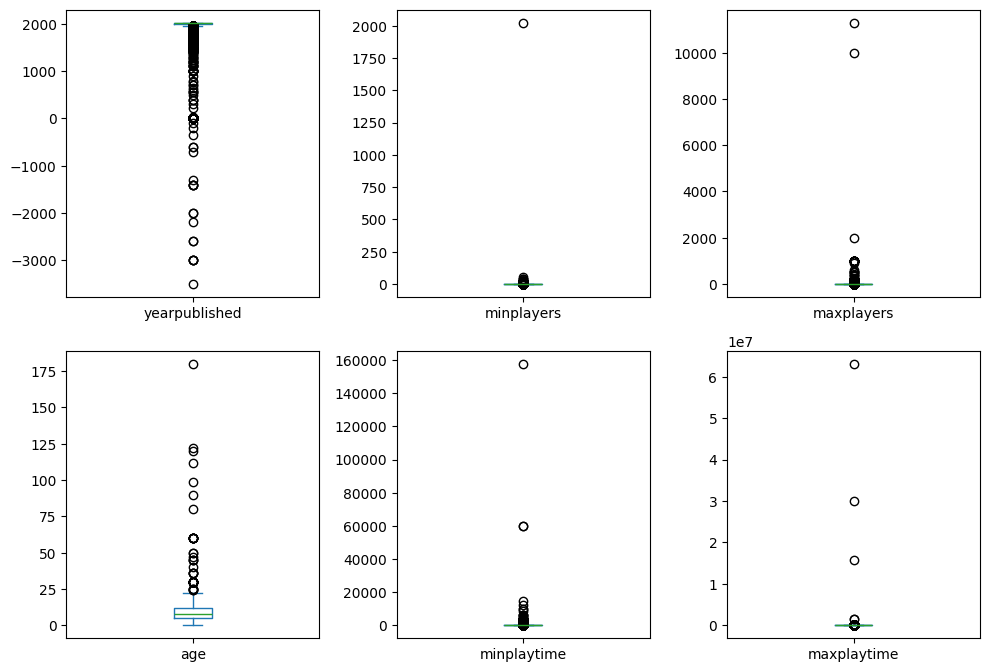

In [13]:
dt.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))
plt.tight_layout()
plt.show()

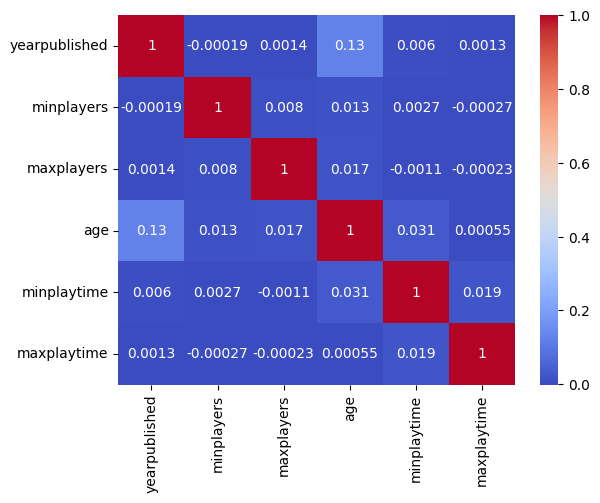

<Figure size 2000x2000 with 0 Axes>

In [17]:
corr = dt[['yearpublished', 'minplayers', 'maxplayers', 'age', 'minplaytime', 'maxplaytime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(20, 20))
plt.show()

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382040 entries, 0 to 382039
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               382039 non-null  object 
 1   yearpublished      153620 non-null  float64
 2   boardgamecategory  151034 non-null  object 
 3   minplayers         153620 non-null  float64
 4   maxplayers         153620 non-null  float64
 5   age                153620 non-null  float64
 6   minplaytime        153620 non-null  float64
 7   maxplaytime        153620 non-null  float64
 8   description        381565 non-null  object 
dtypes: float64(6), object(3)
memory usage: 26.2+ MB


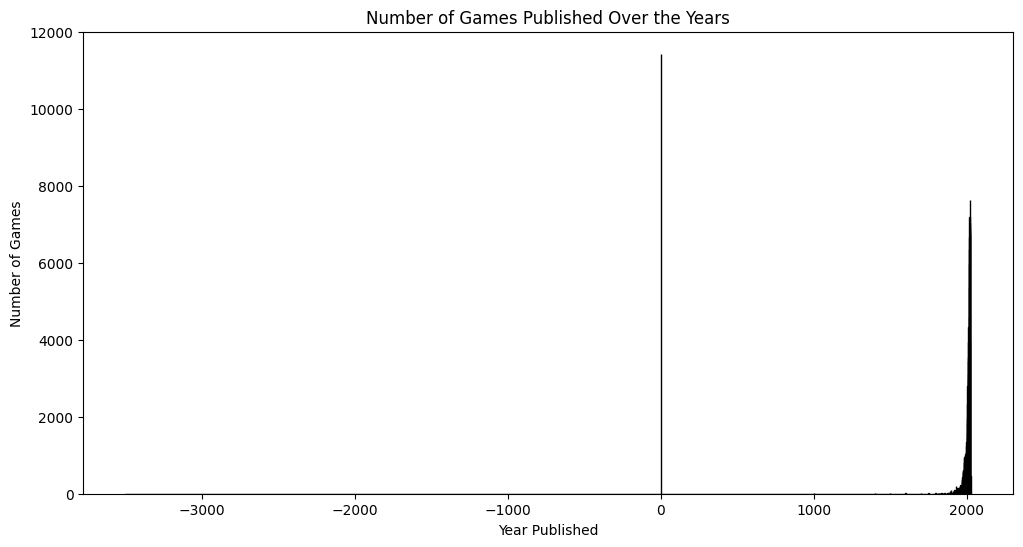

In [19]:
plt.figure(figsize=(12, 6))
dt['yearpublished'].dropna().astype(int).plot(kind='hist', bins=range(int(dt['yearpublished'].min()), int(dt['yearpublished'].max())+1), edgecolor='black')
plt.title('Number of Games Published Over the Years')
plt.xlabel('Year Published')
plt.ylabel('Number of Games')
plt.show()

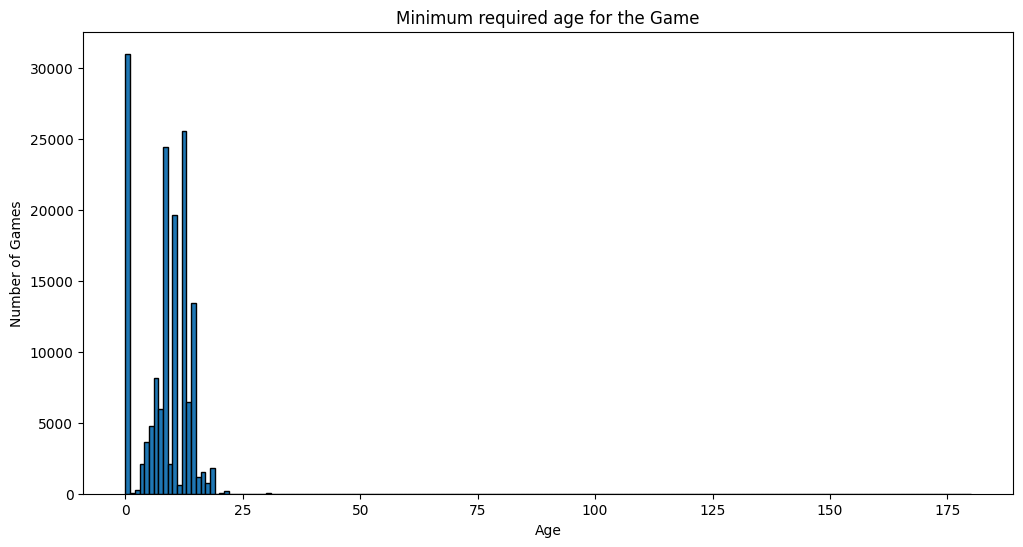

In [20]:
plt.figure(figsize=(12, 6))
dt['age'].dropna().astype(int).plot(kind='hist', bins=range(int(dt['age'].min()), int(dt['age'].max())+1), edgecolor='black')
plt.title('Minimum required age for the Game')
plt.xlabel('Age')
plt.ylabel('Number of Games')
plt.show()

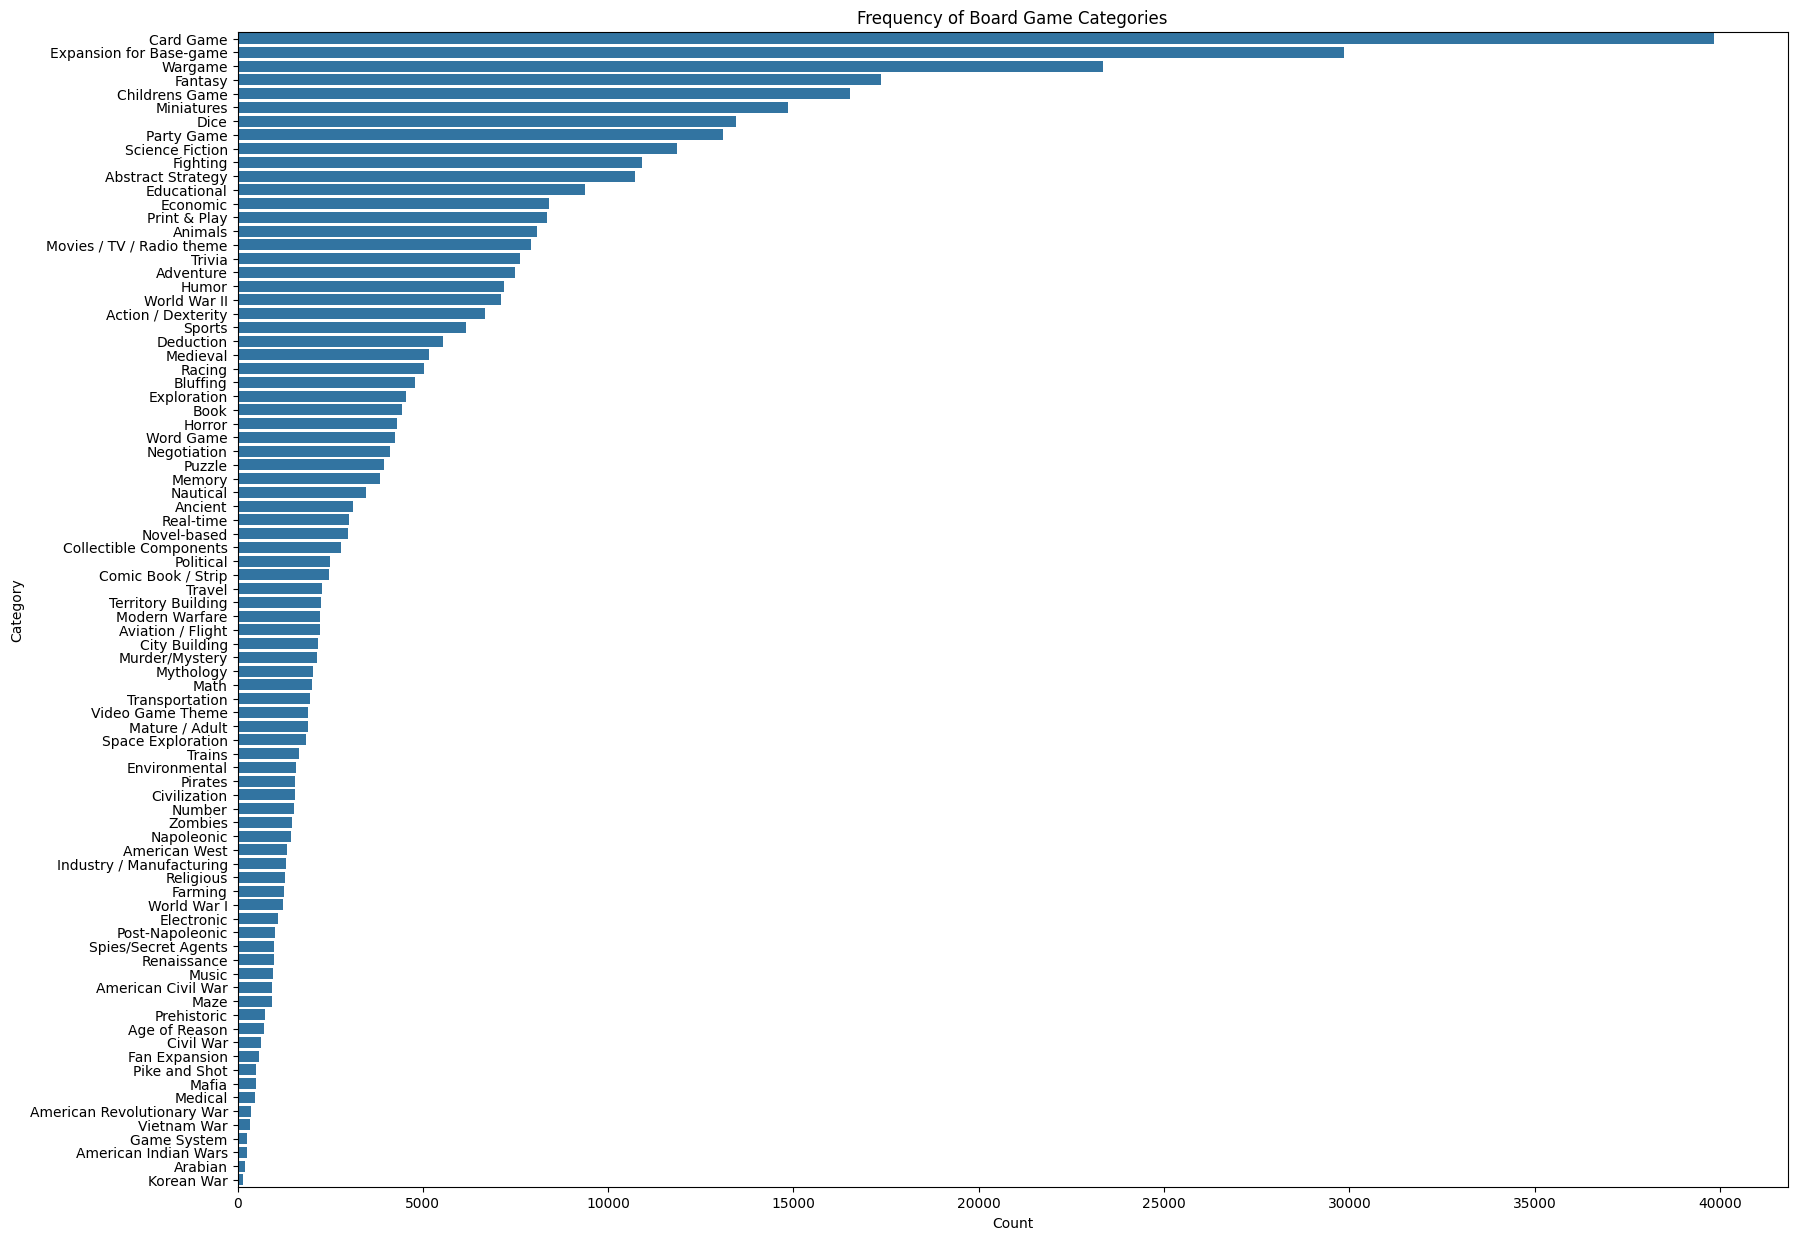

In [21]:
categories = dt['boardgamecategory'].dropna().apply(ast.literal_eval)
category_counts = Counter([category for sublist in categories for category in sublist])

sorted_categories = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(20, 15))
sns.barplot(x=list(sorted_categories.values()), y=list(sorted_categories.keys()))
plt.title('Frequency of Board Game Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

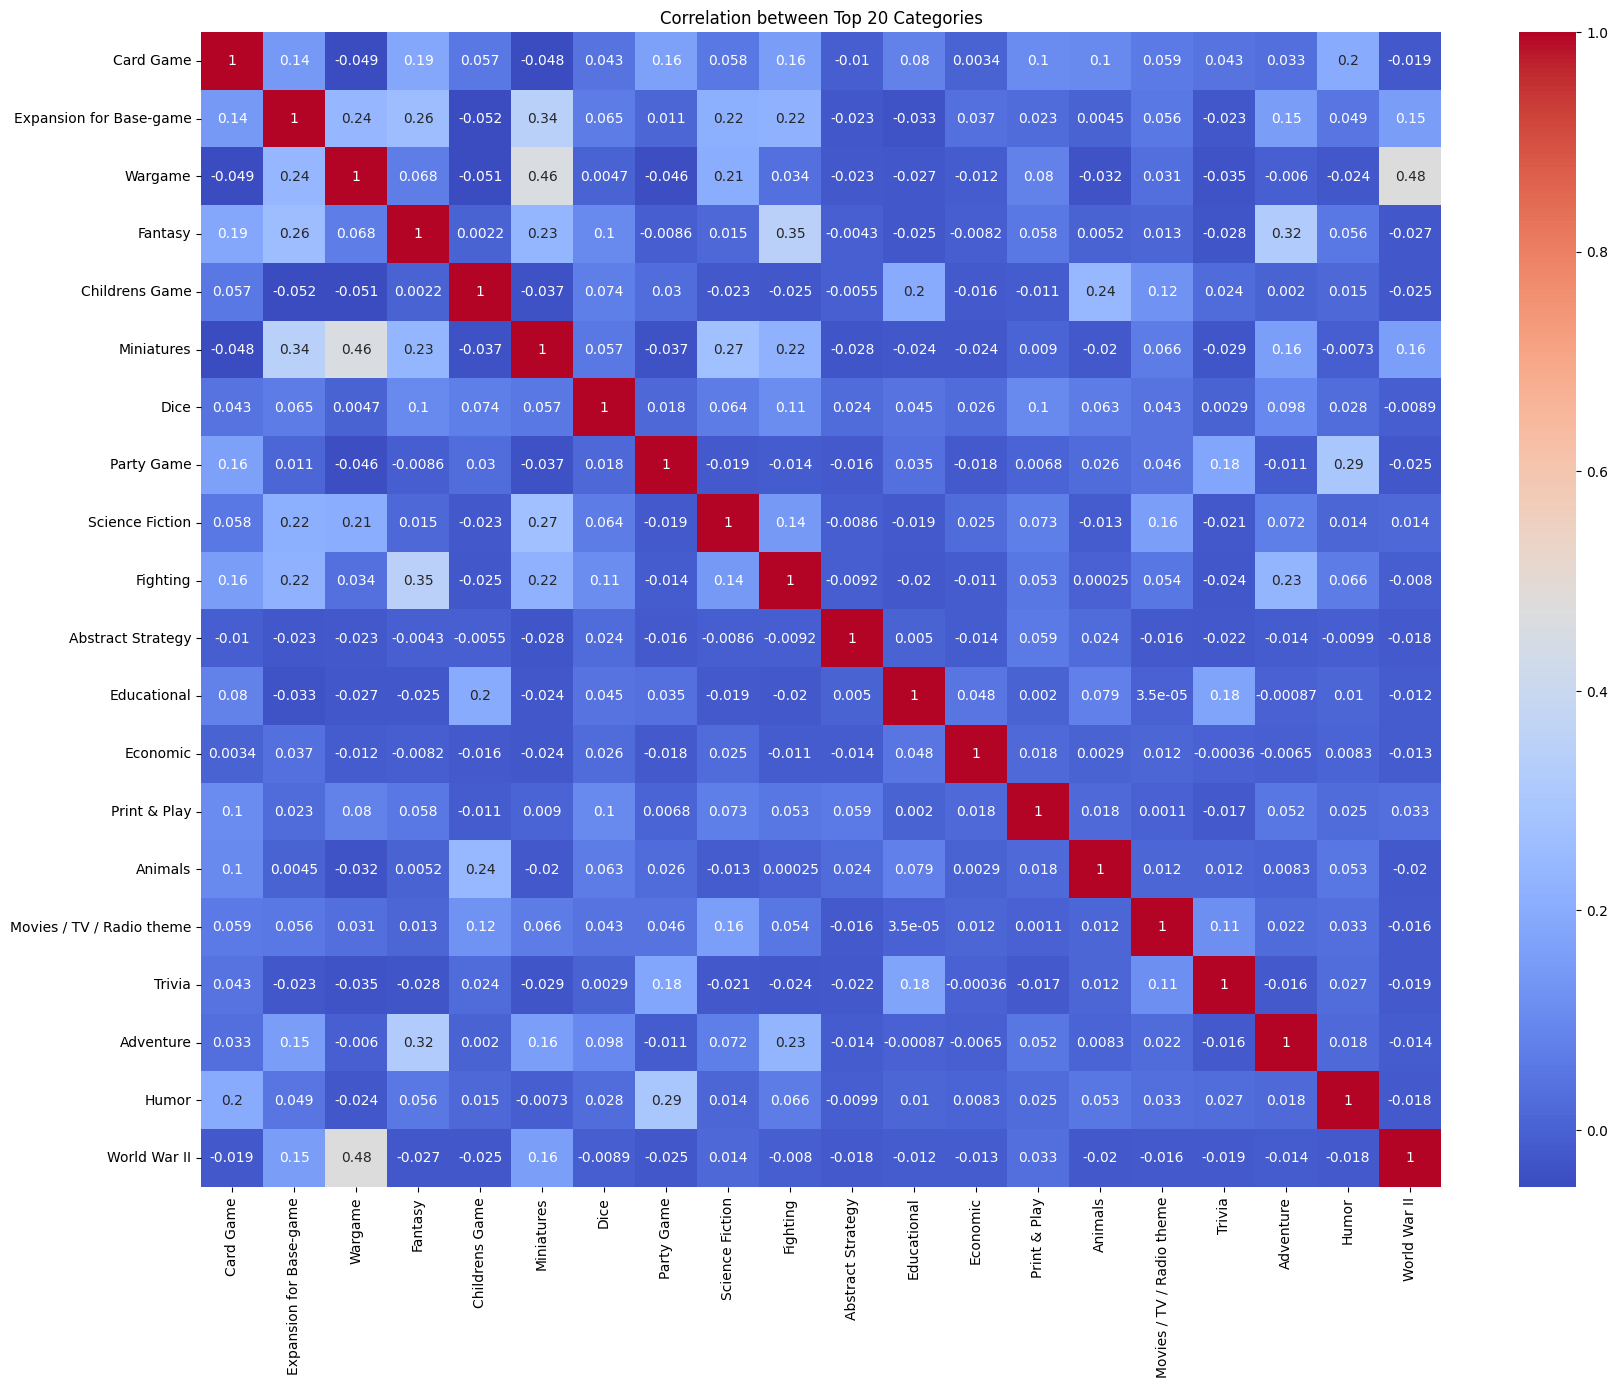

In [22]:
top_20_categories = list(sorted_categories.keys())[:20]

for category in top_20_categories:
    dt[category] = dt['boardgamecategory'].apply(lambda x: category in ast.literal_eval(x) if pd.notnull(x) else False)

correlation_matrix = dt[top_20_categories].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Top 20 Categories')
plt.show()

# Podsumowanie

Mapa korelacji podstawowych danych o planszówce nie wykazuje większych powiązań pomiędzy kategoriami z wyjątkiem minimalnego i maksymalnego czasu rozgrywki (im wyższy minimalny czas tym większy czas maksymalny)

Na początku lat 2000 liczba wydawanych rocznie gier gwałtownie wzrasta i ani razu nie maleje 

Minimalna liczba graczy potrzebnych do gry w zdecydowanej większości przypadków zamyka się w przedziale 2-4 graczy

Większość gier ma ograniczenia wiekowe góra dla graczy do lat 13 co oznacza że niewiele gier jest przeznaczonych tylko dla dorosłego odbiorcy